In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/cleaned_df_v2.csv")
df.head()

,tagline,basic_description,description,superhost,response_rate,host_description,discounted_price,original_price,average_rating,num_reviews,Guests,Bedrooms,Beds,response_time,cleanliness_rating,accuracy_rating,checkin_rating,communication_rating,location_rating,value_rating,Per_Night,Cleaning_Fee,Airbnb_Fee,checkin_time,checkout_time,Available_Amenities,Unavailable_Amenities
0,Cute Inner City Haven with Country-like Serenity,home,"Welcome to our unique home, offering country s...",1,100,1,118,118,5.00,19,2,1,1,Responds within an hour,5.0,5.0,5.0,5.0,5.0,5.0,118.0,0.0,0.0,Check-in after 4:00 p.m.,Checkout before 11:00 a.m.,"['Hair dryer', 'Hot water', 'Washer', 'HDTV', ...","['Dryer', 'Air conditioning', 'Essentials']"
1,Modern suite overlooking downtown,guest suite,"In Calgary's most vibrant neighborhood, overlo...",1,100,1,131,131,4.94,69,2,1,1,Responds within an hour,4.9,5.0,5.0,5.0,5.0,4.9,90.0,100.0,78.0,Check-in: 4:00 p.m.–11:00 p.m.,Checkout before 11:00 a.m.,"['City skyline view', 'Bathtub', 'Hair dryer',...","['Exterior security cameras on property', 'Air..."
2,Bridgeland Inner City Suite,guest suite,Welcome to our Bridgeland Inner City suite. T...,1,100,1,130,130,4.87,53,2,1,1,Responds within an hour,4.9,4.9,5.0,4.9,4.9,4.9,90.0,75.0,74.0,Check-in after 3:00 p.m.,Checkout before 11:00 a.m.,"['Bathtub', 'Hair dryer', 'Cleaning products',...","['Exterior security cameras on property', 'Air..."
3,Cozy Suite In The Heart Of Bridgeland - BL246108,rental unit,Welcome to Calgary and we invite you to Bridge...,1,100,1,90,90,4.84,267,3,1,2,Responds within an hour,4.9,4.8,4.9,4.9,4.9,4.8,61.0,60.0,51.0,Check-in after 3:00 p.m.,Checkout before 11:00 a.m.,"['Hair dryer', 'Shampoo', 'Conditioner', 'Hot ...","['Exterior security cameras on property', 'Kit..."
4,"Mid Century Zen Suite. 1 BR. Near DT, C-train.",home,Unique updated century home - this charming 1 ...,1,100,1,121,121,4.93,136,3,1,1,Responds within an hour,4.9,4.9,4.9,5.0,5.0,4.8,80.0,89.0,69.0,Check-in after 3:00 p.m.,Checkout before 11:00 a.m.,"['Garden view', 'Bathtub', 'Hair dryer', 'Clea...","['Exterior security cameras on property', 'Air..."


### Basic description (property type)

In [3]:
df["basic_description"].value_counts()

basic_description
rental unit             89
condo                   78
home                    47
guest suite             25
Room                     9
guesthouse               5
townhouse                5
loft                     4
bungalow                 4
cottage                  1
place                    1
Private room in home     1
Room in hotel            1
Name: count, dtype: int64

In [4]:
## drop Room in hotel
df = df[df["basic_description"] != "Room in hotel"]

In [5]:
## replace place with condo
df["basic_description"] = df["basic_description"].replace("place", "condo")
## replace Private room in home with Room
df["basic_description"] = df["basic_description"].replace(
    "Private room in home", "Room"
)

In [6]:
## median price for each basic description
median_price = df.groupby("basic_description")["Per_Night"].median().reset_index()
median_price.columns = ["Property Type", "Median Price Per Night"]
median_price = median_price.sort_values("Median Price Per Night", ascending=False)

## add value_counts to the table
value_counts = df["basic_description"].value_counts().reset_index()
value_counts.columns = ["Property Type", "Count"]
median_price = value_counts.merge(median_price, on="Property Type")

## adding sum num_reviews as well (which is our proxy for number of bookings (demand))
num_reviews = df.groupby("basic_description")["num_reviews"].sum().reset_index()
num_reviews.columns = ["Property Type", "Total Reviews"]
median_price = median_price.merge(num_reviews, on="Property Type")

median_price = median_price.sort_values("Median Price Per Night", ascending=False)
median_price

,Property Type,Count,Median Price Per Night,Total Reviews
9,cottage,1,135.0,181
6,townhouse,5,131.0,241
7,loft,4,130.5,245
5,guesthouse,5,125.0,637
2,home,47,123.0,2871
1,condo,79,115.0,8543
0,rental unit,89,97.0,3945
8,bungalow,4,89.5,536
3,guest suite,25,82.0,2900
4,Room,10,45.0,892


### Market gaps:

- Cottages, Townhouses, and Lofts - median price per night is high and the number of properties is less.
- These have low supply but high demand
- Oversaturated property types include rental units, condos and guest suites

In [7]:
## median average rating for each basic description
median_rating = df.groupby("basic_description")["average_rating"].median().reset_index()
median_rating.columns = ["Property Type", "Median Rating"]
median_rating = median_rating.sort_values("Median Rating", ascending=False)

## adding num_reviews to the table
num_reviews = df.groupby("basic_description")["num_reviews"].sum().reset_index()
num_reviews.columns = ["Property Type", "Total Reviews"]
median_rating = num_reviews.merge(median_rating, on="Property Type")
median_rating = median_rating.sort_values("Median Rating", ascending=False)
median_rating

,Property Type,Total Reviews,Median Rating
5,guesthouse,637,4.980
2,condo,8543,4.920
6,home,2871,4.910
9,townhouse,241,4.910
4,guest suite,2900,4.900
7,loft,245,4.885
3,cottage,181,4.880
1,bungalow,536,4.875
0,Room,892,4.845
8,rental unit,3945,4.840


The only cottage in the area has a rating of 4.88 out of 181 reviews which is less compared to other proprty types. Therefore, the opportunity arises if the host can provide better and high-quality serivces for the likes of cottages and lofts, the host can start to win the area.

In [8]:
## average cleaning_fee for each basic description
average_cleaning_fee = np.round(
    df.groupby("basic_description")["Cleaning_Fee"].median(), 2
).reset_index()
average_cleaning_fee.columns = ["Property Type", "Median Cleaning Fee"]
average_cleaning_fee = average_cleaning_fee.sort_values(
    "Median Cleaning Fee", ascending=False
)

## add average cleanliness_rating to the table
average_cleanliness_rating = np.round(
    df.groupby("basic_description")["cleanliness_rating"].median(), 2
).reset_index()
average_cleanliness_rating.columns = ["Property Type", "Median Cleanliness Rating"]
average_cleanliness_rating = average_cleanliness_rating.sort_values(
    "Median Cleanliness Rating", ascending=False
)

average_cleaning_fee = average_cleaning_fee.merge(
    average_cleanliness_rating, on="Property Type"
)
average_cleaning_fee = average_cleaning_fee.sort_values(
    "Median Cleaning Fee", ascending=False
)
average_cleaning_fee

,Property Type,Median Cleaning Fee,Median Cleanliness Rating
0,townhouse,130.0,4.80
1,cottage,125.0,4.90
2,home,99.0,4.90
3,guesthouse,90.0,5.00
4,condo,79.0,4.90
5,rental unit,70.0,4.80
6,bungalow,65.0,4.80
7,guest suite,60.0,4.90
8,loft,40.0,4.95
9,Room,5.0,4.90


cottage and townhouse even after charging very high amount for cleaning fee (due to the area and number of amenitites) does not have a perfect cleanliness ratings. So clearly we can say that there is a market for cottages and townhouses, with more high-quality services including better cleaning services.

### Cleaning Fee vs Cleaning Rating and other metrics

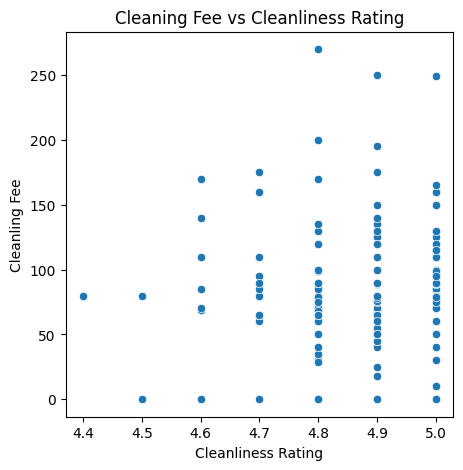

In [9]:
## Cleaning_Fee to cleanliness_rating scatter plot
plt.figure(figsize=(5, 5))
sns.scatterplot(
    x="cleanliness_rating", y="Cleaning_Fee", data=df[df["cleanliness_rating"] > 4]
)
plt.title("Cleaning Fee vs Cleanliness Rating")
plt.xlabel("Cleanliness Rating")
plt.ylabel("Cleanling Fee")
plt.show()

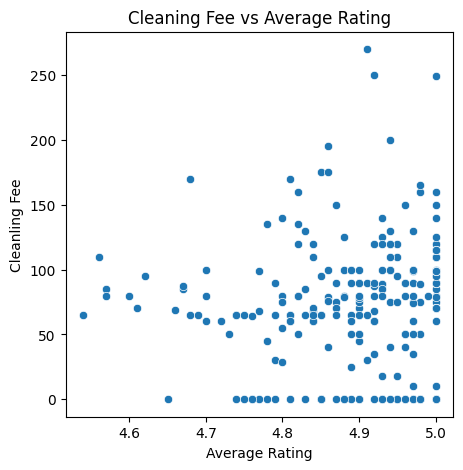

In [10]:
## cleaning_fee to average_rating scatter plot
plt.figure(figsize=(5, 5))
sns.scatterplot(
    x="average_rating", y="Cleaning_Fee", data=df[df["average_rating"] > 4]
)
plt.title("Cleaning Fee vs Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cleanling Fee")
plt.show()

Looks like people prefer to have lesser cleaning fee in order to give higher rating

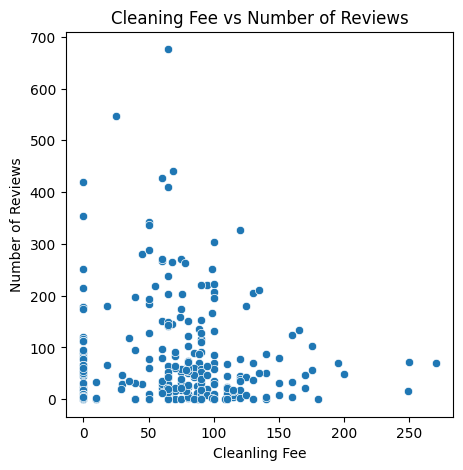

In [11]:
## cleaning_fee to num_reviews scatter plot
plt.figure(figsize=(5, 5))
sns.scatterplot(x="Cleaning_Fee", y="num_reviews", data=df)
plt.title("Cleaning Fee vs Number of Reviews")
plt.xlabel("Cleanling Fee")
plt.ylabel("Number of Reviews")
plt.show()

High number of reviews mean that cleaning fee should be less than a $100. Therefore, we can say that cleaning fee does impact the purchasing for a customer.

### High-performing listings

In [12]:
df["average_rating"].describe()

count    269.000000
mean       4.272156
std        1.630809
min        0.000000
25%        4.790000
50%        4.900000
75%        4.960000
max        5.000000
Name: average_rating, dtype: float64

min of 0 would mean that the property is new and does not have any customers yet

<Figure size 500x500 with 0 Axes>

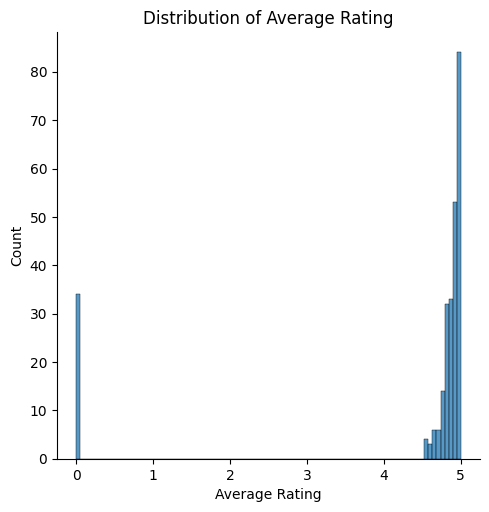

In [13]:
## distribution of average rating
plt.figure(figsize=(5, 5))
sns.displot(df["average_rating"])
plt.title("Distribution of Average Rating")
plt.xlabel ("Average Rating")
plt.show()

For high performing listings we can remove the 0 average_rating and then look at the rest of the data.

<Figure size 500x500 with 0 Axes>

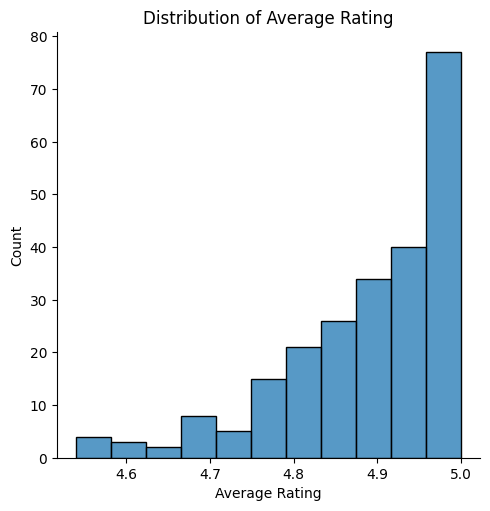

In [14]:
## distribution of average rating (removing 0 rating)
plt.figure(figsize=(5, 5))
sns.displot(df[df["average_rating"] > 0]["average_rating"])
plt.title("Distribution of Average Rating")
plt.xlabel ("Average Rating")
plt.show()

In [15]:
df_rating_non_zero = df[df["average_rating"] > 0]

In [16]:
num_listings_5_rating = df_rating_non_zero[
    df_rating_non_zero["average_rating"] == 5
].shape[0]
print(
    f"Number of listing with rating = 5 is: {num_listings_5_rating}, which is {np.round(num_listings_5_rating/df.shape[0]*100, 2)}% of total listings"
)

Number of listing with rating = 5 is: 43, which is 15.99% of total listings


Since there are 16% of listings with perfect average_review, therefore, we will consider them top-performing listings and then compare other metrics and find out why they are at the top

In [17]:
listings_5_rating = df_rating_non_zero[df_rating_non_zero["average_rating"] == 5]
listings_non_5_rating = df_rating_non_zero[df_rating_non_zero["average_rating"] != 5]

In [18]:
listings_5_rating["basic_description"].value_counts()

basic_description
rental unit    15
condo          14
home            9
guesthouse      2
guest suite     2
Room            1
Name: count, dtype: int64

We can observe that our underserved property types (Cottages, Townhouses, and Lofts) does not have perfect rating, therefore, this creates a market gap for top quality cottages and townhouses

In [19]:
## number of superhost with rating = 5
num_superhost_5_rating = listings_5_rating["superhost"].sum()
print(
    f"Number of superhost with rating = 5 is: {num_superhost_5_rating}, which is {np.round(num_superhost_5_rating/num_listings_5_rating*100, 2)}% of total listings with rating = 5"
)

Number of superhost with rating = 5 is: 30, which is 69.77% of total listings with rating = 5


In [20]:
## number of superhost with rating not 5
num_listings_non_5_rating = listings_non_5_rating.shape[0]
num_superhost_non_5_rating = listings_non_5_rating["superhost"].sum()
print(
    f"Number of superhost with rating = 5 is: {num_superhost_non_5_rating}, which is {np.round(num_superhost_non_5_rating/num_listings_non_5_rating*100, 2)}% of total listings with rating = 5"
)

Number of superhost with rating = 5 is: 159, which is 82.81% of total listings with rating = 5


Therefore, being a superhost might not impact your ratings

In [21]:
## median price for rating = 5 properties
median_price_5_rating = listings_5_rating["Per_Night"].median()
print(f"Median per night price for rating = 5 properties is: {median_price_5_rating}")

Median per night price for rating = 5 properties is: 120.0


In [22]:
## median price for rating not = 5 properties
median_price_non_5_rating = listings_non_5_rating["Per_Night"].median()
print(f"Median per night price for rating not 5 properties is: {median_price_non_5_rating}")

Median per night price for rating not 5 properties is: 100.0


Therefore, having a perfect rating can impact your price per night as you can charge more.

In [23]:
## median cleaning fee for rating = 5 properties
median_cleaning_fee_5_rating = listings_5_rating["Cleaning_Fee"].median()
## median cleaning fee for rating not = 5 properties
median_cleaning_fee_non_5_rating = listings_non_5_rating["Cleaning_Fee"].median()
print(
    f"Median cleaning fee for rating = 5 properties is: {median_cleaning_fee_5_rating}"
)
print(
    f"Median cleaning fee for rating not 5 properties is: {median_cleaning_fee_non_5_rating}"
)

Median cleaning fee for rating = 5 properties is: 90.0
Median cleaning fee for rating not 5 properties is: 72.0


In [24]:
## Airbnb fee for rating = 5 properties
airbnb_fee_5_rating = listings_5_rating["Airbnb_Fee"].median()
## Airbnb fee for rating not = 5 properties
airbnb_fee_non_5_rating = listings_non_5_rating["Airbnb_Fee"].median()
print(f"Median Airbnb fee for rating = 5 properties is: {airbnb_fee_5_rating}")
print(f"Median Airbnb fee for rating not 5 properties is: {airbnb_fee_non_5_rating}")

Median Airbnb fee for rating = 5 properties is: 81.0
Median Airbnb fee for rating not 5 properties is: 75.5


Rating 5 properties are charging more for the cleaning and the Airbnb is also charging slightly more. Therefore, the host should focus on getting a perfect rating in order to start charging more.

In [25]:
## Get median beds, bedrooms and guests_included for rating = 5 properties
median_beds_5_rating = listings_5_rating["Beds"].median()
median_bedrooms_5_rating = listings_5_rating["Bedrooms"].median()
median_guests_included_5_rating = listings_5_rating["Guests"].median()
print(f"Median beds for rating = 5 properties is: {median_beds_5_rating}")
print(f"Median bedrooms for rating = 5 properties is: {median_bedrooms_5_rating}")
print(
    f"Median guests_included for rating = 5 properties is: {median_guests_included_5_rating}"
)

Median beds for rating = 5 properties is: 2.0
Median bedrooms for rating = 5 properties is: 2.0
Median guests_included for rating = 5 properties is: 4.0


In [26]:
## Get median beds, bedrooms and guests_included for rating not = 5 properties
median_beds_non_5_rating = listings_non_5_rating["Beds"].median()
median_bedrooms_non_5_rating = listings_non_5_rating["Bedrooms"].median()
median_guests_included_non_5_rating = listings_non_5_rating["Guests"].median()
print(f"Median beds for rating not 5 properties is: {median_beds_non_5_rating}")
print(f"Median bedrooms for rating not 5 properties is: {median_bedrooms_non_5_rating}")
print(
    f"Median guests_included for rating not 5 properties is: {median_guests_included_non_5_rating}"
)

Median beds for rating not 5 properties is: 2.0
Median bedrooms for rating not 5 properties is: 1.0
Median guests_included for rating not 5 properties is: 4.0


In [27]:
## 'cleanliness_rating', 'accuracy_rating', 'checkin_rating', 'communication_rating', 'location_rating', 'value_rating' for rating = 5 properties
print(
    f"Median cleanliness rating for rating = 5 properties is: {listings_5_rating['cleanliness_rating'].median()}"
)
print(
    f"Median accuracy rating for rating = 5 properties is: {listings_5_rating['accuracy_rating'].median()}"
)
print(
    f"Median checkin rating for rating = 5 properties is: {listings_5_rating['checkin_rating'].median()}"
)
print(
    f"Median communication rating for rating = 5 properties is: {listings_5_rating['communication_rating'].median()}"
)
print(
    f"Median location rating for rating = 5 properties is: {listings_5_rating['location_rating'].median()}"
)
print(
    f"Median value rating for rating = 5 properties is: {listings_5_rating['value_rating'].median()}"
)

Median cleanliness rating for rating = 5 properties is: 5.0
Median accuracy rating for rating = 5 properties is: 5.0
Median checkin rating for rating = 5 properties is: 5.0
Median communication rating for rating = 5 properties is: 5.0
Median location rating for rating = 5 properties is: 5.0
Median value rating for rating = 5 properties is: 5.0


In [28]:
## 'cleanliness_rating', 'accuracy_rating', 'checkin_rating', 'communication_rating', 'location_rating', 'value_rating' for rating not = 5 properties
print(
    f"Median cleanliness rating for rating not 5 properties is: {listings_non_5_rating['cleanliness_rating'].median()}"
)
print(
    f"Median accuracy rating for rating not 5 properties is: {listings_non_5_rating['accuracy_rating'].median()}"
)
print(
    f"Median checkin rating for rating not 5 properties is: {listings_non_5_rating['checkin_rating'].median()}"
)
print(
    f"Median communication rating for rating not 5 properties is: {listings_non_5_rating['communication_rating'].median()}"
)
print(
    f"Median location rating for rating not 5 properties is: {listings_non_5_rating['location_rating'].median()}"
)
print(
    f"Median value rating for rating not 5 properties is: {listings_non_5_rating['value_rating'].median()}"
)

Median cleanliness rating for rating not 5 properties is: 4.9
Median accuracy rating for rating not 5 properties is: 4.9
Median checkin rating for rating not 5 properties is: 4.9
Median communication rating for rating not 5 properties is: 5.0
Median location rating for rating not 5 properties is: 4.9
Median value rating for rating not 5 properties is: 4.8


The listings with perfect rating have perfect rating for each metric including cleanliness, checkin, communication, location, and value. 

### Amenitites

In [29]:
df["Available_Amenities"] = df["Available_Amenities"].apply(ast.literal_eval)
df["Unavailable_Amenities"] = df["Unavailable_Amenities"].apply(ast.literal_eval)

In [30]:
df["Available_Amenities"][0]

['Hair dryer',
 'Hot water',
 'Washer',
 'HDTV',
 'Central heating',
 'Exterior security cameras on property',
 'Smoke alarm',
 'Carbon monoxide alarm',
 'Fire extinguisher',
 'Wifi',
 'Dedicated workspace',
 'Kitchen',
 'Coffee maker',
 'Free parking',
 'Self check-in',
 'Keypad']

In [31]:
def get_amenities(df):
    amenities = df["Available_Amenities"].sum()
    amenities = pd.Series(amenities)
    amenities = amenities.value_counts().reset_index()
    amenities.columns = ["Amenity", "Count"]
    amenities = amenities.sort_values("Count", ascending=False)
    return amenities

In [32]:
## get the most used amenities
amenities = get_amenities(df)
amenities.head(10)

,Amenity,Count
0,Wifi,272
1,HDTV,266
2,Smoke alarm,263
3,Kitchen,258
4,Hot water,256
5,Carbon monoxide alarm,243
6,Shampoo,242
7,Dishes and silverware,242
8,Microwave,238
9,Bed linens,238


In [33]:
## least used amenities
amenities.tail(10)

,Amenity,Count
190,Building staff,1
199,"Shared outdoor pool – available seasonally, op...",1
191,Booster-seat high chair – always at the listing,1
192,Baby monitor,1
193,"Shared outdoor pool – available seasonally, op...",1
194,Clamp-on-table-seat high chair – always at the...,1
195,"Clothing storage: walk-in closet, closet, ward...",1
197,High chair – available upon request,1
198,Game console,1
220,Clothing storage: walk-in closet and dresser,1


### underserved amenitites

In [34]:
def unederserved_amenities(df, amenity):
    df_amenity = df[df["Available_Amenities"].apply(lambda x: amenity in x)]
    ## number of listings with the amenity
    print(f"Number of listings with {amenity}: {df_amenity.shape[0]}")
    print("*" * 15)
    ## median price per night
    print(
        f"Median per night price for places with {amenity}: {df_amenity['Per_Night'].median()}"
    )
    print(f"Median per night price overall: {df['Per_Night'].median()}")
    print("*" * 15)
    ## median number of reviews
    print(
        f"Median number of reviews for places with {amenity}: {df_amenity['num_reviews'].median()}"
    )
    print(f"Median number of reviews  overall: {df['num_reviews'].median()}")
    print("*" * 15)
    ## median rating
    print(
        f"Median rating for places with {amenity}: {df_amenity['average_rating'].median()}"
    )
    print(f"Median rating overall: {df['average_rating'].median()}")

In [35]:
unederserved_amenities(df, "Host greets you")

Number of listings with Host greets you: 8
***************
Median per night price for places with Host greets you: 121.5
Median per night price overall: 102.0
***************
Median number of reviews for places with Host greets you: 57.0
Median number of reviews  overall: 45.0
***************
Median rating for places with Host greets you: 4.945
Median rating overall: 4.9


In [36]:
unederserved_amenities(df, "City skyline view")

Number of listings with City skyline view: 64
***************
Median per night price for places with City skyline view: 109.5
Median per night price overall: 102.0
***************
Median number of reviews for places with City skyline view: 69.5
Median number of reviews  overall: 45.0
***************
Median rating for places with City skyline view: 4.92
Median rating overall: 4.9


In [37]:
unederserved_amenities(df, "Luggage drop-off allowed")

Number of listings with Luggage drop-off allowed: 84
***************
Median per night price for places with Luggage drop-off allowed: 99.0
Median per night price overall: 102.0
***************
Median number of reviews for places with Luggage drop-off allowed: 60.5
Median number of reviews  overall: 45.0
***************
Median rating for places with Luggage drop-off allowed: 4.9
Median rating overall: 4.9


In [38]:
unederserved_amenities(df, "Gym")

Number of listings with Gym: 26
***************
Median per night price for places with Gym: 117.0
Median per night price overall: 102.0
***************
Median number of reviews for places with Gym: 61.0
Median number of reviews  overall: 45.0
***************
Median rating for places with Gym: 4.96
Median rating overall: 4.9


In [39]:
unederserved_amenities(df, "Hot tub")

Number of listings with Hot tub: 7
***************
Median per night price for places with Hot tub: 142.0
Median per night price overall: 102.0
***************
Median number of reviews for places with Hot tub: 125.0
Median number of reviews  overall: 45.0
***************
Median rating for places with Hot tub: 4.9
Median rating overall: 4.9


In [40]:
unederserved_amenities(df, "EV charger")

Number of listings with EV charger: 14
***************
Median per night price for places with EV charger: 120.0
Median per night price overall: 102.0
***************
Median number of reviews for places with EV charger: 62.5
Median number of reviews  overall: 45.0
***************
Median rating for places with EV charger: 4.89
Median rating overall: 4.9


In [41]:
unederserved_amenities(df, "Backyard")

Number of listings with Backyard: 68
***************
Median per night price for places with Backyard: 102.0
Median per night price overall: 102.0
***************
Median number of reviews for places with Backyard: 74.5
Median number of reviews  overall: 45.0
***************
Median rating for places with Backyard: 4.905
Median rating overall: 4.9


In [42]:
unederserved_amenities(df, "Sauna")

Number of listings with Sauna: 3
***************
Median per night price for places with Sauna: 172.0
Median per night price overall: 102.0
***************
Median number of reviews for places with Sauna: 175.0
Median number of reviews  overall: 45.0
***************
Median rating for places with Sauna: 4.9
Median rating overall: 4.9


In [43]:
unederserved_amenities(df, "Exterior security cameras on property")

Number of listings with Exterior security cameras on property: 112
***************
Median per night price for places with Exterior security cameras on property: 109.0
Median per night price overall: 102.0
***************
Median number of reviews for places with Exterior security cameras on property: 44.5
Median number of reviews  overall: 45.0
***************
Median rating for places with Exterior security cameras on property: 4.905
Median rating overall: 4.9


- Clearly, this area needs luxury services as it is underserved but still in demand, this include: City skyline view, Gym, Hot Tub, Sauna, EV Charger (with the expansion of EV cars, it is still underserved in the area).

- Some other amenities like Greeted by host to build trust, Luggage drop-off allowed, Exterior security cameras on property can get you more calls while also chraging more compared to the rest of the area

### Superhost

In [44]:
## Number of superhost
num_superhost = df["superhost"].sum()
print(
    f"Number of superhost: {num_superhost}, which is {np.round(num_superhost/df.shape[0]*100, 2)}% of total listings"
)

Number of superhost: 203, which is 75.46% of total listings


In [45]:
## median price for superhost vs non-superhost
median_price_superhost = df[df["superhost"] == 1]["Per_Night"].median()
median_price_non_superhost = df[df["superhost"] == 0]["Per_Night"].median()
print(f"Median per night price for superhost: {median_price_superhost}")
print(f"Median per night price for non-superhost: {median_price_non_superhost}")

Median per night price for superhost: 105.0
Median per night price for non-superhost: 98.5


Superhost can charge slightly more as it helps the customers to trust the host

### Number of bedrooms

In [46]:
# bedrooms
df["Bedrooms"].value_counts()

Bedrooms
1    145
2     93
3     19
4      8
5      4
Name: count, dtype: int64

In [49]:
## median price for each bedroom
median_price_bedrooms = df.groupby("Bedrooms")["Per_Night"].median().reset_index()
median_price_bedrooms.columns = ["Bedrooms", "Median Price Per Night"]
median_price_per_bedroom = (
    median_price_bedrooms["Median Price Per Night"] / median_price_bedrooms["Bedrooms"]
)
median_price_bedrooms["Median Price Per Night Per Bedroom"] = median_price_per_bedroom
median_price_bedrooms = median_price_bedrooms.sort_values(
    "Median Price Per Night", ascending=False
)
median_price_bedrooms

,Bedrooms,Median Price Per Night,Median Price Per Night Per Bedroom
4,5,250.5,50.100
3,4,182.5,45.625
2,3,138.0,46.000
1,2,117.0,58.500
0,1,92.0,92.000


As the bedroom increases the median per night price also increases but median price per night per bedroom decreases 

In [50]:
## cleaning fee for each bedroom
median_cleaning_fee_bedrooms = np.round(
    df.groupby("Bedrooms")["Cleaning_Fee"].median(), 2
).reset_index()
median_cleaning_fee_bedrooms.columns = ["Bedrooms", "Median Cleaning Fee"]
median_cleaning_fee_bedrooms = median_cleaning_fee_bedrooms.sort_values(
    "Median Cleaning Fee", ascending=False
)
median_cleaning_fee_bedrooms

,Bedrooms,Median Cleaning Fee
3,4,150.0
4,5,149.5
2,3,100.0
1,2,80.0
0,1,65.0


### Number of beds

In [51]:
## number of beds
df["Beds"].value_counts()

Beds
2     120
1      81
3      42
4      16
5       5
6       3
7       1
10      1
Name: count, dtype: int64

In [54]:
## median price for each bed
median_price_bed = df.groupby("Beds")["Per_Night"].median().reset_index()
median_price_bed.columns = ["Beds", "Median Price Per Night"]
median_price_per_bed = (
    median_price_bed["Median Price Per Night"] / median_price_bed["Beds"]
)
median_price_bed["Median Price Per Night Per Beds"] = median_price_per_bed
median_price_bed = median_price_bed.sort_values(
    "Median Price Per Night Per Beds", ascending=False
)
median_price_bed

,Beds,Median Price Per Night,Median Price Per Night Per Beds
0,1,90.0,90.000000
1,2,103.0,51.500000
4,5,200.0,40.000000
2,3,112.0,37.333333
3,4,147.0,36.750000
6,7,251.0,35.857143
7,10,311.0,31.100000
5,6,170.0,28.333333


Smaller number of beds and bedrooms in the place are more efficient as you can charge more per night per bedroom or per bed

### Analyzing properties with 0 num_reviews so far

In [56]:
df_rating_zero = df[df["num_reviews"] == 0]
print(f"Number of properties with 0 reviews: {df_rating_zero.shape[0]}")

Number of properties with 0 reviews: 34


In [57]:
df_rating_non_zero = df[df["num_reviews"] != 0]
print(f"Number of properties with non-0 reviews: {df_rating_non_zero.shape[0]}")

Number of properties with non-0 reviews: 235


In [62]:
## properties types with 0 reviews
df_rating_zero["basic_description"].value_counts()

basic_description
rental unit    21
home            7
condo           3
Room            3
Name: count, dtype: int64

In [58]:
## Comparing median price for properties with 0 reviews vs non-0 reviews
median_price_zero_reviews = df_rating_zero["Per_Night"].median()
median_price_non_zero_reviews = df_rating_non_zero["Per_Night"].median()
print(
    f"Median per night price for properties with 0 reviews: {median_price_zero_reviews}"
)
print(
    f"Median per night price for properties with non-0 reviews: {median_price_non_zero_reviews}"
)

Median per night price for properties with 0 reviews: 94.5
Median per night price for properties with non-0 reviews: 102.0


In [60]:
## Comparing median cleaning fee for properties with 0 reviews vs non-0 reviews
print(
    f"Median cleaning fee for properties with 0 reviews: {df_rating_zero['Cleaning_Fee'].median()}"
)
print(
    f"Median cleaning fee for properties with non-0 reviews: {df_rating_non_zero['Cleaning_Fee'].median()}"
)

Median cleaning fee for properties with 0 reviews: 72.5
Median cleaning fee for properties with non-0 reviews: 75.0


The properties with 0 bookings are charging similar amount of money for cleaning, therefore, one recommendation would be to start with reduced cleaning fee and get some booking with positive reviews. This can definitely help them start getting bookings.

In [61]:
## Comparing superhost percentage
num_superhost_zero_reviews = df_rating_zero["superhost"].sum()
num_superhost_non_zero_reviews = df_rating_non_zero["superhost"].sum()
print(
    f"Number of superhost with 0 reviews: {num_superhost_zero_reviews}, which is {np.round(num_superhost_zero_reviews/df_rating_zero.shape[0]*100, 2)}% of total listings with 0 reviews"
)
print(
    f"Number of superhost with non-0 reviews: {num_superhost_non_zero_reviews}, which is {np.round(num_superhost_non_zero_reviews/df_rating_non_zero.shape[0]*100, 2)}% of total listings with non-0 reviews"
)

Number of superhost with 0 reviews: 14, which is 41.18% of total listings with 0 reviews
Number of superhost with non-0 reviews: 189, which is 80.43% of total listings with non-0 reviews


Therefore, being a superhost can help you get started if you are not getting any booking

In [67]:
## comparing host_description
num_host_desc_zero_reviews = df_rating_zero["host_description"].sum()
num_host_desc_non_zero_reviews = df_rating_non_zero["host_description"].sum()
print(
    f"Number of hosts who have a description with 0 reviews: {num_host_desc_zero_reviews}, which is {np.round(num_host_desc_zero_reviews/df_rating_zero.shape[0]*100, 2)}% of total listings with 0 reviews"
)
print(
    f"Number of hosts who have a description with non-0 reviews: {num_host_desc_non_zero_reviews}, which is {np.round(num_host_desc_non_zero_reviews/df_rating_non_zero.shape[0]*100, 2)}% of total listings with non-0 reviews"
)

Number of hosts who have a description with 0 reviews: 25, which is 73.53% of total listings with 0 reviews
Number of hosts who have a description with non-0 reviews: 218, which is 92.77% of total listings with non-0 reviews


Almost all of the listings with non-0 reviews have host descriptions, which might impact the decision of a customer as it helps build trust. Therefore, another way to get bookings would be to introduce yourselves on the listing and this could help you build trust and therefore, get the bookings.

In [91]:
def get_amenities(df):
    amenities = df["Available_Amenities"].sum()
    amenities = pd.Series(amenities)
    amenities = amenities.value_counts().reset_index()
    amenities.columns = ["Amenity", "Count"]
    ## adding percentage of listings with the amenity
    amenities["Percentage"] = np.round(amenities["Count"] / df.shape[0] * 100, 2)
    amenities = amenities.sort_values("Count", ascending=False)
    return pd.DataFrame(amenities)

In [92]:
## Comparing the amenities for properties with 0 reviews vs non-0 reviews
amenities_zero_reviews = get_amenities(df_rating_zero)
amenities_zero_reviews.head(10)

,Amenity,Count,Percentage
0,HDTV,34,100.00
2,Kitchen,34,100.00
1,Wifi,34,100.00
3,Smoke alarm,33,97.06
4,Washer,30,88.24
5,Carbon monoxide alarm,29,85.29
6,Hot water,27,79.41
7,Bed linens,25,73.53
8,Microwave,24,70.59
9,Fire extinguisher,24,70.59


In [93]:
amenities_non_zero_reviews = get_amenities(df_rating_non_zero)
amenities_non_zero_reviews.head(10)

,Amenity,Count,Percentage
0,Wifi,238,101.28
1,HDTV,232,98.72
2,Smoke alarm,230,97.87
3,Hot water,229,97.45
4,Kitchen,224,95.32
5,Shampoo,220,93.62
6,Dishes and silverware,220,93.62
7,Refrigerator,219,93.19
8,Coffee maker,219,93.19
9,Hangers,215,91.49


In [102]:
## percentage of listings with coffee maker for 0 reviews properties vs non-0 reviews properties if it is available
print(
    f"Percentage of listings with coffee maker for 0 reviews properties: {amenities_zero_reviews[amenities_zero_reviews['Amenity'] == 'Coffee maker']['Percentage'].values[0]}%"
)
print(
    f"Percentage of listings with coffee maker for non-0 reviews properties: {amenities_non_zero_reviews[amenities_non_zero_reviews['Amenity'] == 'Coffee maker']['Percentage'].values[0]}%"
)

Percentage of listings with coffee maker for 0 reviews properties: 52.94%
Percentage of listings with coffee maker for non-0 reviews properties: 93.19%


In [105]:
## percentage of listings with Refrigerator for 0 reviews properties vs non-0 reviews properties if it is available
print(
    f"Percentage of listings with Refrigerator for 0 reviews properties: {amenities_zero_reviews[amenities_zero_reviews['Amenity'] == 'Refrigerator']['Percentage'].values[0]}%"
)
print(
    f"Percentage of listings with Refrigerator for non-0 reviews properties: {amenities_non_zero_reviews[amenities_non_zero_reviews['Amenity'] == 'Refrigerator']['Percentage'].values[0]}%"
)

Percentage of listings with Refrigerator for 0 reviews properties: 50.0%
Percentage of listings with Refrigerator for non-0 reviews properties: 93.19%


In [107]:
## percentage of listings with Outdoor furniture for 0 reviews properties vs non-0 reviews properties if it is available
print(
    f"Percentage of listings with Outdoor furniture for 0 reviews properties: {amenities_zero_reviews[amenities_zero_reviews['Amenity'] == 'Outdoor furniture']['Percentage'].values[0]}%"
)
print(
    f"Percentage of listings with Outdoor furniture for non-0 reviews properties: {amenities_non_zero_reviews[amenities_non_zero_reviews['Amenity'] == 'Outdoor furniture']['Percentage'].values[0]}%"
)

Percentage of listings with Outdoor furniture for 0 reviews properties: 20.59%
Percentage of listings with Outdoor furniture for non-0 reviews properties: 48.94%


In [108]:
## percentage of listings with Exterior security cameras on property for 0 reviews properties vs non-0 reviews properties if it is available
print(
    f"Percentage of listings with Exterior security cameras on property for 0 reviews properties: {amenities_zero_reviews[amenities_zero_reviews['Amenity'] == 'Exterior security cameras on property']['Percentage'].values[0]}%"
)
print(
    f"Percentage of listings with Exterior security cameras on property for non-0 reviews properties: {amenities_non_zero_reviews[amenities_non_zero_reviews['Amenity'] == 'Exterior security cameras on property']['Percentage'].values[0]}%"
)

Percentage of listings with Exterior security cameras on property for 0 reviews properties: 17.65%
Percentage of listings with Exterior security cameras on property for non-0 reviews properties: 45.11%


Therefore, the properties with no reviews (no bookings) so far, they need to invest in basic amenities such as Coffee maker, refrigerator which is available in almost all of the properties with non-0 reviews, while only 50% of properties that have 0 reviews provide those basic amenities. Further, these properties can provide some other facilities such as Outdoor furniture and Exterior security cameras on property to further attract customers.